<a href="https://colab.research.google.com/github/sahintarkan/python/blob/main/Statistics_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas ile ilgili gerekli basit kodlar
**data.head()** --- datanın ilk 5 satırına ulaşmak için

**data.tail()** -- son 5

**data.sample(10)** -- random 10 satır

**data.değ_isim** veya **data['değ_isim']** data içinde ismi verilen sütuna ulaşmak için



# **ÖDEV-1**

### A-Data
seaborn kütüphanesinden 'mpg' dataseti.

**import seaborn as sns**

**data = seaborn.load_dataset('mpg')**


In [ ]:
import seaborn as sns

veri = sns.load_dataset('mpg')

In [ ]:
data = veri.copy()

In [ ]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
294,34.1,4,86.0,65.0,1975,15.2,79,japan,maxda glc deluxe
114,26.0,4,98.0,90.0,2265,15.5,73,europe,fiat 124 sport coupe
291,19.2,8,267.0,125.0,3605,15.0,79,usa,chevrolet malibu classic (sw)
112,19.0,4,122.0,85.0,2310,18.5,73,usa,ford pinto
53,31.0,4,71.0,65.0,1773,19.0,71,japan,toyota corolla 1200


In [ ]:
data.origin

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

### B-Ödevin alt başlıkları
> 1-Veri neyle alakalı olduğunu anlamaya çalışınız. Kaynak google...

> 2-Veri tiplerinin açıklayınız.

**data_ismi.head()**

veya

**data_ismi.sample(sayı gir)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


> 3-Describe istatistikleri inceleyiniz ve veri dağılımları, outlairler hakkınnda çıkarsamalar yapınız.

**data_ismi.describe()**


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [ ]:
data.describe([0.01,0.05,0.25,0.5,.75,.95,.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
mpg,398.0,23.514573,7.815984,9.0,11.000,13.000,17.500,23.0,29.000,37.030,43.418,46.6
cylinders,398.0,5.454774,1.701004,3.0,3.970,4.000,4.000,4.0,8.000,8.000,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,70.970,85.000,104.250,148.5,262.000,400.000,440.420,455.0
horsepower,392.0,104.469388,38.491160,46.0,48.000,60.550,75.000,93.5,126.000,180.000,220.450,230.0
weight,398.0,2970.424623,846.841774,1613.0,1772.610,1923.500,2223.750,2803.5,3608.000,4464.000,4951.030,5140.0
acceleration,398.0,15.568090,2.757689,8.0,9.485,11.285,13.825,15.5,17.175,20.415,22.239,24.8
model_year,398.0,76.010050,3.697627,70.0,70.000,70.000,73.000,76.0,79.000,82.000,82.000,82.0


In [ ]:
data.weight = -data.weight





> 4-Veriyi uygun grafikler ile görselleştiriniz ve describe istatistikle yaptığınız çıkarımları teyit ediniz.

**sns.pairplot(data_ismi, diag_kind="kde")** Tüm data için

**sns.histplot(data=data_ismi, x="sütun(değişken)_ismi", kde=True)** herbir sütun ayrı

**sns.boxplot(data=data_ismi, x="sütu ismi gir")** kutu grafiği

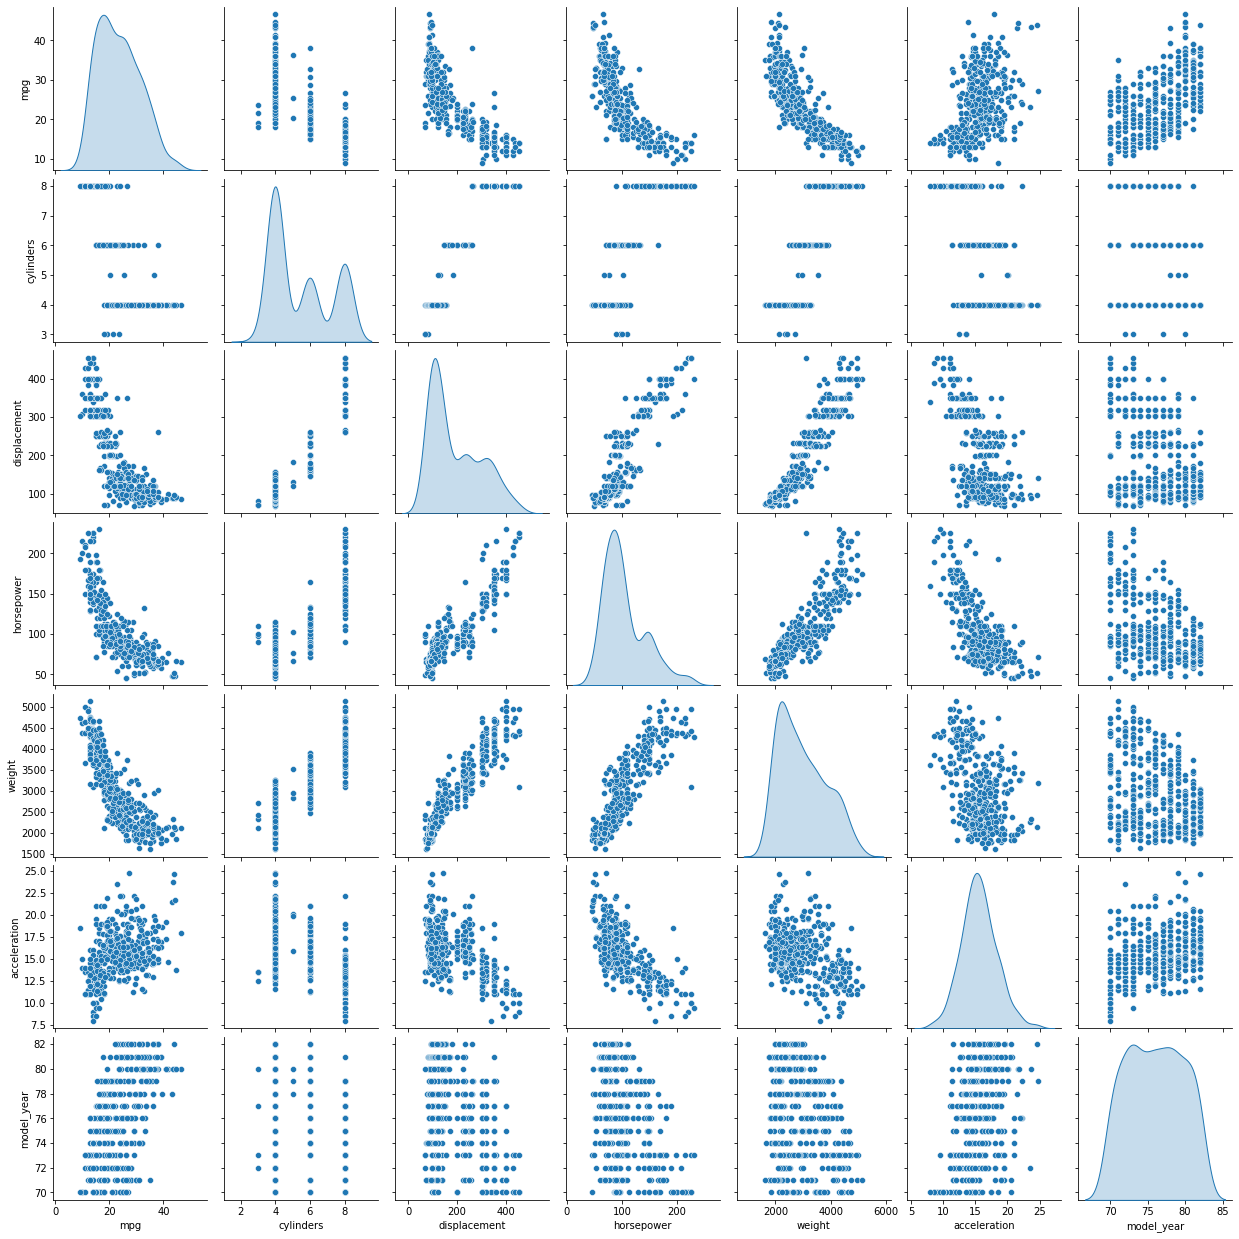

In [ ]:
sns.pairplot(data, diag_kind="kde")

> 5-Mpg datasetinin içindeki mpg değişkeni için doğrusal bir model kurunuz.

*   Hangi değişken ile mpg'yi tahmin etmenin daha doğru olacağına karar verin(Corelation değerlerine bakın)

**sns.heatmap(data_ismi.corr(), vmin=-1, vmax=1, annot=True)**

**sns.regplot(x="değ1", y="değ2", ci=99, data=data_ismi)**


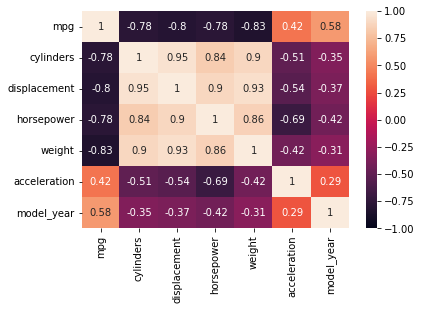

In [ ]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

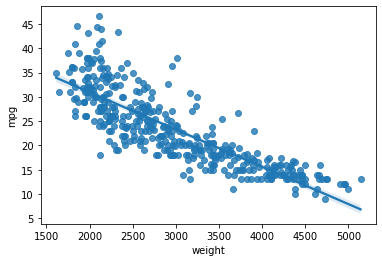

In [ ]:
sns.regplot(y="mpg", x="weight", data=data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['weight'], data['mpg'], test_size=0.33, random_state=42)

*   Bu iki değişkeni train, test diye bölün 

**from sklearn.model_selection import train_test_split**

**değ1_train, değ1_test, değ2_train, değ2_test = train_test_split(data_ismi['değ1'], data_ismi['değ2'], test_size=0.33, random_state=42)** 

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train,y_train)

In [ ]:
x = X_test
y = intercept+slope*x
y


198    32.788358
396    26.301997
33     26.231663
208    16.025413
93     13.704389
         ...    
392    23.762157
379    30.209443
358    26.223848
310    31.436381
145    31.162860
Name: weight, Length: 132, dtype: float64

In [ ]:
y[[0]]

0    19.432706
Name: weight, dtype: float64

In [ ]:
y

46.80827581638857

In [ ]:
y_test[[0]]

0    18.0
Name: mpg, dtype: float64

*   Doğru denklemi için gereksinimlerinize karar verin.

**from scipy import stats**

**slope, intercept, r_value, p_value, std_err = stats.linregress(değ1_train,değ2_train)** Doğru denklemi için slope, intercept, r_value, p_value, std_err bunlardan hangisi gerkli ise onu alın
 

*   Modeli kurun/Doğru denklemi

*   Test setinden bir veri modele girin ve bulduğunuz mpg değeri ile gerçek mpg değerini kıyaslayın

**değ1_test.iloc[[0]]** değ1'in 0 indisli değerini alır.

# **ÖDEV-2**

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(42)
veri1 = np.random.normal(10000, 1000, 500).astype(int)
veri2 = np.random.normal(9000, 900, 500).astype(int)
veri3 = np.random.normal(12000, 1200, 500).astype(int)
veri4 = np.random.normal(10000, 950, 500).astype(int)
df = pd.DataFrame(np.array([veri1,veri2,veri3,veri4]).T, columns=['A_once','B_once','A_sonra','B_sonra'])
olcum = df.copy()

In [ ]:
olcum

,A_once,B_once,A_sonra,B_sonra
0,10496,9833,13679,10739
1,9861,10718,13109,9476
2,10647,7741,12071,9222
3,11523,9506,11223,9996
4,9765,8414,12837,9838
...,...,...,...,...
495,10538,8747,14407,11016
496,8962,10617,14473,9974
497,9809,9576,13450,9162
498,9124,8485,13228,9845


### 1-Data
A ve B bölgelerinden 500 er futbolcunun maçlarda ortalama koştukları mesafeler metre cinsinden yukarda verilmektedir. İki bölgelerdeki futbolculara belli bir diyet uygulandıktan SONRA tekrar ölçümler yapılmıştır.   


### 2-Datayı anlama
*   Describe istatistikle veriyi analiz edin
*   Veriyi uygun grafiklerle görselleştirin

In [ ]:
olcum.describe().T

,count,mean,std,min,25%,50%,75%,max
A_once,500.0,10006.336,981.255496,6758.0,9299.25,10012.5,10636.00,13852.0
B_once,500.0,9028.146,880.197872,6572.0,8463.50,9025.0,9585.75,11369.0
A_sonra,500.0,12129.684,1212.298473,8524.0,11276.75,12143.5,12905.50,15122.0
B_sonra,500.0,10031.004,934.875836,7206.0,9418.00,9991.0,10664.50,13033.0


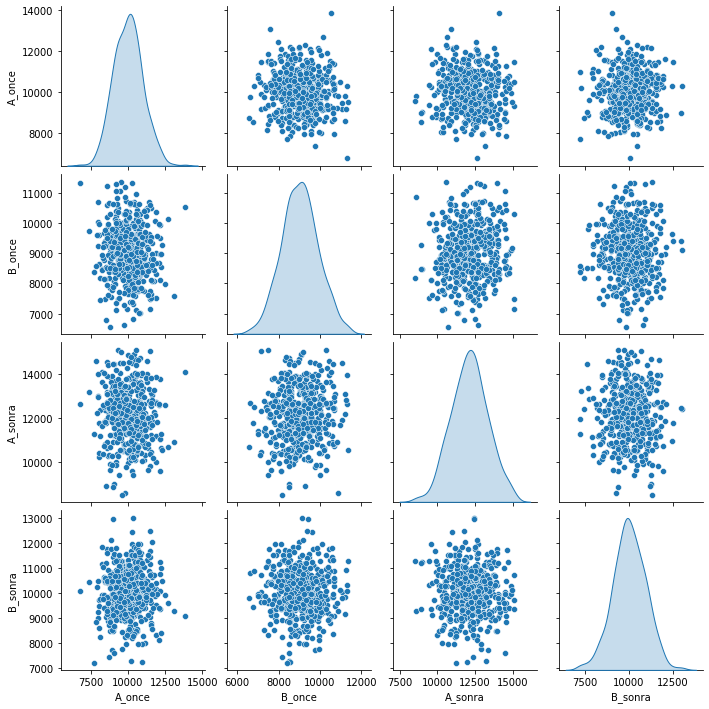

In [ ]:
sns.pairplot(olcum, diag_kind="kde")

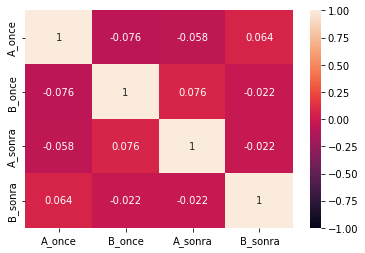

In [ ]:
sns.heatmap(olcum.corr(), vmin=-1, vmax=1, annot=True)

### 3-Normallik testi
Verilerin normal dağılıp-dağılmadığını % 95 güvenle test edin (alfa=0,05 olarak almalısınız ve Shapira Wilk testi uygulayabilirsiniz)

> Hipotezi kurun (H0 ve H1 Hipotezi. H0'in yokluk hipotezi olduğunu unutmayın. Yani normal dağılımla farkı yoktur gibi)

> Kritik değere karar verin(alfa=0,05, % 95 güvenle gibi)

> P_değeri ile alfayı kıyaslayın. (H0 red veya reddeilemez)

**from scipy.stats import shapiro**

**t_değeri,p_değeri =  shapiro(data_ismi)**

H0 = yokluk hipotezi(fark yoktur, normal dağlımla fark yoktur)
H1 = vardır

In [ ]:
from scipy.stats import shapiro

t_değeri,p_değeri = shapiro(olcum.A_once)

In [ ]:
p_değeri

0.4010743498802185

In [ ]:
from scipy.stats import shapiro

t_değeri,p_değeri = shapiro(olcum.B_once)
p_değeri

0.6761667728424072

In [ ]:
t_value, p_value = shapiro(olcum["A_once"])
alpha = 0.05
print(t_value, p_value) 
if p_value > alpha:
    print('The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.')
else:
    print('H1 hypothesis is rejected. There is enough evidence to say that the data is not normally distributed.')

0.9967007040977478 0.4010743498802185
The H0 hypothesis cannot be rejected. There is not enough evidence to say that the data is not normally distributed.


### 4-Test istatistiği
*   Tüm futbolcuların ortalama 10000 metre koştuğu iddiasını her bölge için  ayrı ayrı test ediniz (Tek örneklem t veya z testi)

**Hipotez adımları yukardaki ile aynı**

**from scipy import stats**

**stats.ttest_1samp(değ_ismi, popülasyon_ortalaması = ?)** 

*   Herbir bölge için ayrı ayrı oyunculara uygulanan diyetlerin işe yarayıp yaramadığını test ediniz.(Bağımlı İki Örneklem t Testi)

**test_değeri,p_değeri = stats.ttest_rel(değ1,değ2, equal_var = True)**


*   Diyet oncesi ve sonrası ayrı ayrı, her iki bölgedeki oyuncuların arasında anlamlı bir fark olup olmadığını test ediniz. (Bağımsız İki Örneklem t testi(AB Testi))

**test_değeri,p_değeri = stats.ttest_ind(değ1,değ2, equal_var = True)**

H0 = A bol olcum oncesi ortalama 10000
H1 = farklıdır
alfa = 0.05

In [ ]:
from scipy import stats

stats.ttest_1samp(olcum.A_once, popmean= 10000)

Ttest_1sampResult(statistic=0.1443836673305787, pvalue=0.8852558068210546)

In [ ]:
olcum.describe().T

,count,mean,std,min,25%,50%,75%,max
A_once,500.0,10006.336,981.255496,6758.0,9299.25,10012.5,10636.00,13852.0
B_once,500.0,9028.146,880.197872,6572.0,8463.50,9025.0,9585.75,11369.0
A_sonra,500.0,12129.684,1212.298473,8524.0,11276.75,12143.5,12905.50,15122.0
B_sonra,500.0,10031.004,934.875836,7206.0,9418.00,9991.0,10664.50,13033.0


Herbir bölge için ayrı ayrı oyunculara uygulanan diyetlerin işe yarayıp yaramadığını test ediniz.(Bağımlı İki Örneklem t Testi)

H0 = A_once, A_sonra arasnıya  fark YOKTUR

H1 = Vardır

alfa = 0.05 % 95 güvenle

In [ ]:
test_değeri,p_değeri = stats.ttest_rel(olcum.A_once,olcum.A_sonra)

In [ ]:
p_değeri

5.3664592819786775e-112

p_değeri<alfa

Diyet oncesi ve sonrası ayrı ayrı, her iki bölgedeki oyuncuların arasında anlamlı bir fark olup olmadığını test ediniz. (Bağımsız İki Örneklem t testi(AB Testi))

In [ ]:
test_değeri,p_değeri = stats.ttest_ind(değ1,değ2, equal_var = True)

H0 = A_once, B_once fark YOKTUR

H1 = Vardır

In [ ]:
test_değeri,p_değeri = stats.ttest_ind(olcum.A_once, olcum.B_once)

In [ ]:
p_değeri

8.564745398943361e-55

p_değeri<alfa